Pada hands-on kali ini, **kita akan berkenalan dengan berbagai teknik analisis data dan pemodelan klasifikasi** untuk memahami dinamika produktivitas karyawan di era kecerdasan buatan. Pendekatan yang digunakan bersifat eksperimental dan komparatif, di mana kita tidak hanya sekadar mengolah angka, tetapi membedah bagaimana teknologi AI memengaruhi kesejahteraan mental dan efisiensi kerja karyawan secara paralel.

Melalui dataset **AI Workplace Productivity** yang relevan, kita akan mencoba memahami bagaimana setiap model:

- Menangkap pola hubungan antara penggunaan alat AI, beban kerja manual, dan dampaknya terhadap risiko burnout.
- Merespons kompleksitas data yang melibatkan interaksi antara variabel numerik (seperti jam fokus) dan kategorikal (seperti peran pekerjaan).
- Menghadapi tantangan nyata dalam data science seperti data leakage, feature alignment, serta pentingnya interpretability model bagi pengambil keputusan di sisi HR.

---

Hands-on ini tidak hanya berfokus pada hasil akhir berupa nilai akurasi, tetapi juga pada pemahaman perilaku model—kapan sebuah fitur menjadi prediktor kuat, dan bagaimana kita mendeteksi titik jenuh di mana beban kerja mulai merusak produktivitas.

Di akhir sesi, Anda diharapkan mampu:

- Melakukan analisis eksploratif (EDA) secara mendalam untuk menemukan business insight yang dapat ditindaklanjuti.
- Membangun sistem prediksi risiko burnout yang objektif menggunakan algoritma Random Forest.
- Mendeploy hasil analisis ke dalam dashboard interaktif menggunakan Streamlit untuk kebutuhan pemangku kepentingan (stakeholders).
- Memahami trade-off antara produktivitas yang tinggi dengan risiko kelelahan karyawan guna menciptakan lingkungan kerja yang berkelanjutan.

# Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Sejauh mana penggunaan AI benar-benar meningkatkan produktivitas?
- Pertanyaan 2: Apakah tingginya tingkat otomasi berbanding lurus dengan pengurangan kesalahan atau error?
- Pertanyaan 3: Peran pekerjaan mana yang paling efektif dalam memanfaatkan AI?
- Pertanyaan 4: Apa pemicu utama risiko burnout di perusahaan?
- Pertanyaan 5: Berapa batas ideal jam rapat sebelum produktivitas mulai menurun tajam?
- Pertanyaan 6: Apakah tingkat pengalaman kerja menjamin produktivitas yang lebih tinggi?
- Pertanyaan 7: Bagaimana profil karyawan dengan produktifitas terbaik?

# Import Library/Packages yang Digunakan

In [ ]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling

## Gathering Data

Langkah pertama adalah memuat dataset ke dalam environment notebook. Kita perlu melihat beberapa baris pertama data untuk mendapatkan gambaran umum mengenai fitur-fitur (kolom) yang tersedia.

In [ ]:
!unzip ai_productivity.zip -d ai_productivity

Archive:  ai_productivity.zip
  inflating: ai_productivity/ai_productivity_features.csv  
  inflating: ai_productivity/ai_productivity_targets.csv  


In [ ]:
df_features = pd.read_csv('/content/ai_productivity/ai_productivity_features.csv')
df_features

,Employee_ID,job_role,experience_years,ai_tool_usage_hours_per_week,tasks_automated_percent,manual_work_hours_per_week,learning_time_hours_per_week,deadline_pressure_level,meeting_hours_per_week,collaboration_hours_per_week,error_rate_percent,task_complexity_score,focus_hours_per_day,work_life_balance_score,burnout_risk_score
0,3c6ca882-3fa3-446b-8208-c92f3f306f06,Writer,99,11.8,28.5%,19.2,1.4,High,1.9,2.3,0.20,2,7.1,4.8,10.00
1,02f168cc-7747-4dbd-a868-ea2cfb41e22a,Designer,4,10.8,24.1%,23.3,2.6,Low,500.0,9.8,1.82,3,3.4,5.5,6.78
2,d39ce8c9-6e2a-4f86-b888-e2b5f4a18cf7,developer,6,25.9,69.4%,10.0,1.4,Medium,6.8,8.9,5.52,5,4.6,3.8,9.66
3,14511660-d78a-453f-9449-f17cd239ec27,mgr,20,7.9,17.2%,25.1,0.2,High,3.5,8.6,1.14,5,5.6,3.9,10.00
4,0597f0bb-ed5a-4e35-94ac-3f0f6a5c2bc2,developer,15,8.6,20.6%,20.1,1.4,Low,5.9,5.3,2.75,10,1.0,7.4,5.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4545,adf0332f-8d0e-4fd6-b8b5-8dc38c1dd1fe,Writer,14,15.4,39.2%,12.3,1.2,Low,8.5,9.2,4.78,8,5.4,7.0,5.67
4546,e1c8e648-d2e4-4568-a2c9-947e5c31a606,Designer,12,1.5,0.5%,23.6,1.5,High,1.0,5.0,0.10,7,7.3,6.5,9.32
4547,6cf8720b-f950-4230-8906-6ead574c1de2,Writer,1,15.3,34.9%,21.5,2.6,Medium,1.1,4.3,2.96,4,5.2,5.0,8.77
4548,d99e5127-653f-4da2-a372-547a6fc735d9,mgr,10,7.8,14.2%,20.6,2.2,High,18.6,15.8,0.80,2,2.9,1.2,10.00


In [ ]:
df_targets = pd.read_csv('/content/ai_productivity/ai_productivity_targets.csv')
df_targets

,Employee_ID,productivity_score,burnout_risk_level
0,3c6ca882-3fa3-446b-8208-c92f3f306f06,81.0,High
1,02f168cc-7747-4dbd-a868-ea2cfb41e22a,59.2,Medium
2,d39ce8c9-6e2a-4f86-b888-e2b5f4a18cf7,62.4,High
3,14511660-d78a-453f-9449-f17cd239ec27,76.8,High
4,0597f0bb-ed5a-4e35-94ac-3f0f6a5c2bc2,53.7,Medium
...,...,...,...
4495,05acc22b-86b7-4aa4-9b80-33b3c77a5b82,93.9,Medium
4496,338e2ff5-8be0-48de-8abb-98c72f5648b3,81.7,High
4497,249bce23-5c4b-4671-8239-1e121109a680,60.6,Medium
4498,ffc95b77-3960-4b40-908f-1275ba5bbf91,69.8,High


## Assessing Data

Setelah data berhasil dikumpulkan, langkah selanjutnya adalah melakukan penilaian (assessing) untuk mengidentifikasi masalah kualitas dalam dataset. Pemeriksaan ini mencakup aspek-aspek berikut:

1. **Pemeriksaan Tipe Data**. Kita perlu memastikan bahwa setiap kolom memiliki tipe data yang sesuai dengan isinya (misalnya, kolom tanggal harus bertipe `datetime`, bukan `object`).

2. **Pemeriksaan Missing Values**. Mengecek keberadaan nilai yang hilang (*null/NaN*) di setiap kolom. Hal ini penting karena nilai yang kosong dapat memengaruhi hasil analisis dan performa model machine learning.

3. **Pemeriksaan Data Duplikat**. Mengidentifikasi apakah terdapat baris data yang berulang secara identik dalam dataset yang dapat menyebabkan bias pada hasil statistik.

4. **Ringkasan Parameter Statistik:**. Melihat distribusi data melalui ringkasan statistik (seperti mean, median, min, max, dan kuartil) untuk mendeteksi adanya anomali atau nilai ekstrem (*outliers*).

### df_features

In [ ]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4550 entries, 0 to 4549
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Employee_ID                   4550 non-null   object 
 1   job_role                      4550 non-null   object 
 2   experience_years              4550 non-null   int64  
 3   ai_tool_usage_hours_per_week  4320 non-null   float64
 4   tasks_automated_percent       4550 non-null   object 
 5   manual_work_hours_per_week    4550 non-null   float64
 6   learning_time_hours_per_week  4550 non-null   float64
 7   deadline_pressure_level       4550 non-null   object 
 8   meeting_hours_per_week        4550 non-null   float64
 9   collaboration_hours_per_week  4550 non-null   float64
 10  error_rate_percent            4550 non-null   float64
 11  task_complexity_score         4550 non-null   int64  
 12  focus_hours_per_day           4550 non-null   float64
 13  wor

**Inkonsistensi Tipe Data**.
* **`tasks_automated_percent`**: Kolom ini memiliki tipe data `object` (string). Seharusnya kolom ini bertipe numerik (`float` atau `int`) agar bisa digunakan dalam perhitungan statistik. Hal ini kemungkinan disebabkan oleh adanya karakter non-numerik (seperti simbol '%').

**Masalah Kualitas Data (Missing Values)**

Ditemukan adanya nilai yang hilang pada dua kolom berikut:
* **`ai_tool_usage_hours_per_week`**: Terdapat 230 baris data yang kosong (4320 non-null dari 4550 baris).
* **`work_life_balance_score`**: Terdapat 227 baris data yang kosong (4323 non-null dari 4550 baris).

**Ringkasan Struktur Data**
* Dataset terdiri dari **4.550 entri** dan **15 kolom**.
* Komposisi tipe data terdiri dari: `float64` (9 kolom), `int64` (2 kolom), dan `object` (4 kolom).

In [ ]:
df_features.isna().sum()

,0
Employee_ID,0
job_role,0
experience_years,0
ai_tool_usage_hours_per_week,230
tasks_automated_percent,0
manual_work_hours_per_week,0
learning_time_hours_per_week,0
deadline_pressure_level,0
meeting_hours_per_week,0
collaboration_hours_per_week,0


In [ ]:
df_features.duplicated().sum()

np.int64(50)

In [ ]:
df_features.describe()

,experience_years,ai_tool_usage_hours_per_week,manual_work_hours_per_week,learning_time_hours_per_week,meeting_hours_per_week,collaboration_hours_per_week,error_rate_percent,task_complexity_score,focus_hours_per_day,work_life_balance_score,burnout_risk_score
count,4550.000000,4320.000000,4550.000000,4550.000000,4550.000000,4550.000000,4550.000000,4550.000000,4550.000000,4323.000000,4550.000000
mean,10.447033,10.368634,22.371495,1.999363,6.680725,8.243319,2.096429,5.502418,4.697451,4.711219,8.352712
std,5.894260,5.805103,6.469079,1.406330,8.687353,3.043855,1.517658,2.860402,1.338329,1.996020,1.813034
min,1.000000,0.000000,10.000000,0.000000,1.000000,2.000000,0.100000,1.000000,1.000000,1.000000,3.220000
25%,5.000000,6.000000,17.900000,1.000000,3.400000,6.200000,0.710000,3.000000,3.900000,3.300000,6.850000
50%,10.000000,9.800000,22.500000,1.700000,5.700000,8.000000,2.000000,6.000000,4.800000,4.700000,9.010000
75%,15.000000,14.300000,26.800000,2.700000,8.200000,9.900000,3.290000,8.000000,5.600000,6.100000,10.000000
max,99.000000,30.400000,43.300000,11.500000,500.000000,20.000000,6.670000,10.000000,8.000000,10.000000,10.000000


**Indikasi Outliers (Anomali)**

Ditemukan beberapa nilai ekstrem yang tidak wajar pada kolom berikut:
* **`experience_years`**: Nilai maksimum adalah **99 tahun**, sedangkan kuartil ke-3 (75%) hanya berada di angka 15 tahun. Ini mengindikasikan adanya entri data yang tidak valid.
* **`meeting_hours_per_week`**: Terdapat nilai maksimum **500 jam per minggu**. Secara logika, satu minggu hanya memiliki 168 jam, sehingga data ini adalah *outlier* yang sangat ekstrem dan perlu dibersihkan.

**Sebaran Nilai dan Skala**
* **`burnout_risk_score`**: Memiliki rata-rata **8.35** dengan nilai minimum **3.22**, menunjukkan bahwa mayoritas sampel berada pada tingkat risiko burnout yang cenderung tinggi.
* **`error_rate_percent`**: Rata-rata tingkat kesalahan berada di angka **2.09%**, dengan rentang yang cukup sempit (min 0.1% hingga max 6.67%).
* **`work_life_balance_score`**: Rata-rata skor berada di **4.71** dari skala 10, yang mengindikasikan keseimbangan kehidupan kerja yang moderat cenderung rendah bagi sebagian besar karyawan.

**Konsistensi Jumlah Data**
* Sesuai dengan pemeriksaan sebelumnya, kolom **`ai_tool_usage_hours_per_week`** dan **`work_life_balance_score`** memiliki jumlah baris (count) yang lebih rendah (4320 dan 4323) dibandingkan kolom lainnya (4550), mengonfirmasi adanya *missing values*.

In [ ]:
df_features[df_features['experience_years'] >= 60]

,Employee_ID,job_role,experience_years,ai_tool_usage_hours_per_week,tasks_automated_percent,manual_work_hours_per_week,learning_time_hours_per_week,deadline_pressure_level,meeting_hours_per_week,collaboration_hours_per_week,error_rate_percent,task_complexity_score,focus_hours_per_day,work_life_balance_score,burnout_risk_score
0,3c6ca882-3fa3-446b-8208-c92f3f306f06,Writer,99,11.8,28.5%,19.2,1.4,High,1.9,2.3,0.2,2,7.1,4.8,10.0


In [ ]:
df_features['job_role'].unique()

array(['Writer', 'Designer', 'developer', 'mgr', 'Analyst', 'Marketer'],
      dtype=object)

In [ ]:
df_features['deadline_pressure_level'].unique()

array(['High', 'Low', 'Medium'], dtype=object)

### df_targets

In [ ]:
df_targets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Employee_ID         4500 non-null   object 
 1   productivity_score  4500 non-null   float64
 2   burnout_risk_level  4500 non-null   object 
dtypes: float64(1), object(2)
memory usage: 105.6+ KB


In [ ]:
df_targets.isna().sum()

,0
Employee_ID,0
productivity_score,0
burnout_risk_level,0


In [ ]:
df_targets.duplicated().sum()

np.int64(0)

In [ ]:
df_targets.describe()

,productivity_score
count,4500.000000
mean,64.946600
std,14.297129
min,20.500000
25%,54.975000
50%,64.800000
75%,74.900000
max,100.000000


In [ ]:
df_targets['burnout_risk_level'].unique()

array(['High', 'Medium', 'Low'], dtype=object)

Dataset `df_targets` sudah bersih, tidak ada nilai yang kosong dan duplikat, semua tipe data sudah sesuai, dan sebaran nilai dan skalanya tidak ada yang mencurigakan.

## Cleaning Data

Setelah mengidentifikasi berbagai masalah pada tahap *Assessing Data*, sekarang kita akan melakukan pembersihan untuk memastikan data siap untuk dianalisis. Proses ini mencakup perbaikan tipe data, penanganan nilai yang hilang, dan eliminasi anomali (*outliers*).

---

**Memperbaiki Tipe Data**
* Masalah utama ditemukan pada kolom `tasks_automated_percent` yang terbaca sebagai `object`. Kita perlu menghapus karakter non-numerik (seperti '%') dan mengubah tipenya menjadi `float`.

**Menangani Missing Values**

Terdapat nilai yang hilang pada kolom penggunaan alat AI dan skor keseimbangan kerja. Kita akan menggunakan strategi **imputasi** agar tidak kehilangan terlalu banyak informasi:
* **`ai_tool_usage_hours_per_week`**: Akan diisi menggunakan nilai median karena adanya potensi kemiringan distribusi.
* **`work_life_balance_score`**: Akan diisi menggunakan nilai mean atau median untuk menjaga integritas statistik.

**Menangani Outliers (Anomali)**

Berdasarkan temuan statistik, kita akan melakukan *filtering* atau penggantian nilai pada data yang tidak masuk akal secara logika:
* **`meeting_hours_per_week`**: Menghapus atau memperbaiki data dengan nilai > 168 jam (batas jam dalam seminggu).
* **`experience_years`**: Memperbaiki data dengan nilai ekstrem (seperti 99 tahun) yang tidak relevan dengan profil karyawan aktif.

**Menghapus Duplikat**
* Meskipun sebelumnya tidak terdeteksi secara masif, kita akan tetap menjalankan fungsi penghapusan duplikat sebagai langkah preventif untuk memastikan setiap baris bersifat unik.

In [ ]:
# Menghapus data duplikat
df_features = df_features.drop_duplicates()

In [ ]:
# Standarisasi data kategorikal (Standardization)
df_features['job_role'] = df_features['job_role'].replace({
    'developer': 'Developer',
    'mgr': 'Manager'
})

/tmp/ipython-input-1582916216.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features['job_role'] = df_features['job_role'].replace({


In [ ]:
# Memperbaiki tipe data
df_features['tasks_automated_percent'] = df_features['tasks_automated_percent'].str.replace('%', '').astype(float)

/tmp/ipython-input-1946944548.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features['tasks_automated_percent'] = df_features['tasks_automated_percent'].str.replace('%', '').astype(float)


In [ ]:
# Menangani missing value (Imputation)
df_features['ai_tool_usage_hours_per_week'] = df_features['ai_tool_usage_hours_per_week'].fillna(df_features['ai_tool_usage_hours_per_week'].median())
df_features['work_life_balance_score'] = df_features['work_life_balance_score'].fillna(df_features['work_life_balance_score'].median())

/tmp/ipython-input-787991883.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features['ai_tool_usage_hours_per_week'] = df_features['ai_tool_usage_hours_per_week'].fillna(df_features['ai_tool_usage_hours_per_week'].median())
/tmp/ipython-input-787991883.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features['work_life_balance_score'] = df_features['work_life_balance_score'].fillna(df_features['work_life_balance_score'].median())


In [ ]:
# Menangani outliers

# Menghapus data yang secara logis mustahil (pengalaman kerja 99 tahun)
df_features = df_features[df_features['experience_years'] <= 60]

# Menggunakan Metode IQR untuk Jam Meeting yang tidak masuk akal (500 jam)
Q1 = df_features['meeting_hours_per_week'].quantile(0.25)
Q3 = df_features['meeting_hours_per_week'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

# Mengubah nilai yang melewati batas atas menjadi nilai batas atas tersebut
df_features.loc[df_features['meeting_hours_per_week'] > upper_bound, 'meeting_hours_per_week'] = upper_bound


In [ ]:
print("Cek Missing Values:\n", df_features.isna().sum())
print("\nCek Duplikat:", df_features.duplicated().sum())
print("\nUnique Job Roles:", df_features['job_role'].unique())

Cek Missing Values:
 Employee_ID                     0
job_role                        0
experience_years                0
ai_tool_usage_hours_per_week    0
tasks_automated_percent         0
manual_work_hours_per_week      0
learning_time_hours_per_week    0
deadline_pressure_level         0
meeting_hours_per_week          0
collaboration_hours_per_week    0
error_rate_percent              0
task_complexity_score           0
focus_hours_per_day             0
work_life_balance_score         0
burnout_risk_score              0
dtype: int64

Cek Duplikat: 0

Unique Job Roles: ['Designer' 'Developer' 'Manager' 'Analyst' 'Writer' 'Marketer']


In [ ]:
df_features

,Employee_ID,job_role,experience_years,ai_tool_usage_hours_per_week,tasks_automated_percent,manual_work_hours_per_week,learning_time_hours_per_week,deadline_pressure_level,meeting_hours_per_week,collaboration_hours_per_week,error_rate_percent,task_complexity_score,focus_hours_per_day,work_life_balance_score,burnout_risk_score
1,02f168cc-7747-4dbd-a868-ea2cfb41e22a,Designer,4,10.8,24.1,23.3,2.6,Low,15.4,9.8,1.82,3,3.4,5.5,6.78
2,d39ce8c9-6e2a-4f86-b888-e2b5f4a18cf7,Developer,6,25.9,69.4,10.0,1.4,Medium,6.8,8.9,5.52,5,4.6,3.8,9.66
3,14511660-d78a-453f-9449-f17cd239ec27,Manager,20,7.9,17.2,25.1,0.2,High,3.5,8.6,1.14,5,5.6,3.9,10.00
4,0597f0bb-ed5a-4e35-94ac-3f0f6a5c2bc2,Developer,15,8.6,20.6,20.1,1.4,Low,5.9,5.3,2.75,10,1.0,7.4,5.38
5,3efbdd79-5997-496f-ad33-d4b3d31a9ac4,Analyst,4,16.1,34.9,22.1,1.4,Medium,1.0,4.6,3.27,5,6.0,4.7,9.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,05acc22b-86b7-4aa4-9b80-33b3c77a5b82,Developer,18,4.9,15.2,30.3,3.3,Low,1.4,8.1,0.10,3,8.0,6.8,5.80
4496,338e2ff5-8be0-48de-8abb-98c72f5648b3,Writer,17,20.9,49.8,10.0,2.6,High,3.1,10.6,0.10,1,5.7,4.7,10.00
4497,249bce23-5c4b-4671-8239-1e121109a680,Manager,7,4.8,21.1,21.0,0.6,Low,7.2,6.6,3.97,6,3.6,4.7,5.08
4498,ffc95b77-3960-4b40-908f-1275ba5bbf91,Analyst,20,6.9,12.3,28.6,1.3,Medium,8.3,8.2,0.94,6,4.5,3.6,9.83


### Merging Data

In [ ]:
!pip install pandasql

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26773 sha256=ddc18944005edf3b9ff69c22d5bcf5e6f57aed9d852148c2a0180839743e0423
  Stored in directory: /root/.cache/pip/wheels/15/a1/e7/6f92f295b5272ae5c02365e6b8fa19cb93f16a537090a1cf27
Successfully built pandasql


Setelah melewati proses pembersihan, kita kini memiliki dua sumber data yang sudah siap: `df_features` yang berisi atribut perilaku kerja karyawan, dan `df_targets` yang berisi skor produktivitas serta tingkat risiko burnout.

Pada tahap ini, kita akan menggabungkan kedua dataset tersebut menjadi satu DataFrame utama menggunakan library `pandasql`.

Kita menggunakan pendekatan SQL `INNER JOIN` untuk memastikan bahwa hanya data karyawan yang memiliki informasi lengkap (baik di tabel fitur maupun tabel target) yang akan diikutsertakan dalam analisis final.

**Logika Penggabungan:**
* **Metode:** `INNER JOIN`.
* **Kunci Penggabungan (Primary Key):** `Employee_ID`.
* **Tabel Asal:** `df_features` (sebagai tabel utama).
* **Tabel Tujuan:** `df_targets` (mengambil kolom `productivity_score` dan `burnout_risk_level`).

In [ ]:
from pandasql import sqldf

# Menyiapkan fungsi lambda untuk menjalankan query SQL
pysqldf = lambda q: sqldf(q, globals())

# Menulis query SQL untuk penggabungan
query = """
SELECT
    f.*,
    t.productivity_score,
    t.burnout_risk_level
FROM
    df_features AS f
INNER JOIN
    df_targets AS t
ON
    f.Employee_ID = t.Employee_ID
"""

# Eksekusi query
df = pysqldf(query)

In [ ]:
df

,Employee_ID,job_role,experience_years,ai_tool_usage_hours_per_week,tasks_automated_percent,manual_work_hours_per_week,learning_time_hours_per_week,deadline_pressure_level,meeting_hours_per_week,collaboration_hours_per_week,error_rate_percent,task_complexity_score,focus_hours_per_day,work_life_balance_score,burnout_risk_score,productivity_score,burnout_risk_level
0,02f168cc-7747-4dbd-a868-ea2cfb41e22a,Designer,4,10.8,24.1,23.3,2.6,Low,15.4,9.8,1.82,3,3.4,5.5,6.78,59.2,Medium
1,d39ce8c9-6e2a-4f86-b888-e2b5f4a18cf7,Developer,6,25.9,69.4,10.0,1.4,Medium,6.8,8.9,5.52,5,4.6,3.8,9.66,62.4,High
2,14511660-d78a-453f-9449-f17cd239ec27,Manager,20,7.9,17.2,25.1,0.2,High,3.5,8.6,1.14,5,5.6,3.9,10.00,76.8,High
3,0597f0bb-ed5a-4e35-94ac-3f0f6a5c2bc2,Developer,15,8.6,20.6,20.1,1.4,Low,5.9,5.3,2.75,10,1.0,7.4,5.38,53.7,Medium
4,3efbdd79-5997-496f-ad33-d4b3d31a9ac4,Analyst,4,16.1,34.9,22.1,1.4,Medium,1.0,4.6,3.27,5,6.0,4.7,9.00,54.3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4494,05acc22b-86b7-4aa4-9b80-33b3c77a5b82,Developer,18,4.9,15.2,30.3,3.3,Low,1.4,8.1,0.10,3,8.0,6.8,5.80,93.9,Medium
4495,338e2ff5-8be0-48de-8abb-98c72f5648b3,Writer,17,20.9,49.8,10.0,2.6,High,3.1,10.6,0.10,1,5.7,4.7,10.00,81.7,High
4496,249bce23-5c4b-4671-8239-1e121109a680,Manager,7,4.8,21.1,21.0,0.6,Low,7.2,6.6,3.97,6,3.6,4.7,5.08,60.6,Medium
4497,ffc95b77-3960-4b40-908f-1275ba5bbf91,Analyst,20,6.9,12.3,28.6,1.3,Medium,8.3,8.2,0.94,6,4.5,3.6,9.83,69.8,High


In [ ]:
df[df['Employee_ID'] == "3c6ca882-3fa3-446b-8208-c92f3f306f06"]

,Employee_ID,job_role,experience_years,ai_tool_usage_hours_per_week,tasks_automated_percent,manual_work_hours_per_week,learning_time_hours_per_week,deadline_pressure_level,meeting_hours_per_week,collaboration_hours_per_week,error_rate_percent,task_complexity_score,focus_hours_per_day,work_life_balance_score,burnout_risk_score,productivity_score,burnout_risk_level


In [ ]:
# Simpan dan download dataset yang sudah bersih dan lengkap untuk digunakan saat membuat dashboard visualisasi di Streamlit
df.to_csv("df.csv", index=False)

In [ ]:
# Buat copy dataframe untuk pemodelan klasifikasi
df_ml = df.copy()
df_ml

,Employee_ID,job_role,experience_years,ai_tool_usage_hours_per_week,tasks_automated_percent,manual_work_hours_per_week,learning_time_hours_per_week,deadline_pressure_level,meeting_hours_per_week,collaboration_hours_per_week,error_rate_percent,task_complexity_score,focus_hours_per_day,work_life_balance_score,burnout_risk_score,productivity_score,burnout_risk_level
0,02f168cc-7747-4dbd-a868-ea2cfb41e22a,Designer,4,10.8,24.1,23.3,2.6,Low,15.4,9.8,1.82,3,3.4,5.5,6.78,59.2,Medium
1,d39ce8c9-6e2a-4f86-b888-e2b5f4a18cf7,Developer,6,25.9,69.4,10.0,1.4,Medium,6.8,8.9,5.52,5,4.6,3.8,9.66,62.4,High
2,14511660-d78a-453f-9449-f17cd239ec27,Manager,20,7.9,17.2,25.1,0.2,High,3.5,8.6,1.14,5,5.6,3.9,10.00,76.8,High
3,0597f0bb-ed5a-4e35-94ac-3f0f6a5c2bc2,Developer,15,8.6,20.6,20.1,1.4,Low,5.9,5.3,2.75,10,1.0,7.4,5.38,53.7,Medium
4,3efbdd79-5997-496f-ad33-d4b3d31a9ac4,Analyst,4,16.1,34.9,22.1,1.4,Medium,1.0,4.6,3.27,5,6.0,4.7,9.00,54.3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4494,05acc22b-86b7-4aa4-9b80-33b3c77a5b82,Developer,18,4.9,15.2,30.3,3.3,Low,1.4,8.1,0.10,3,8.0,6.8,5.80,93.9,Medium
4495,338e2ff5-8be0-48de-8abb-98c72f5648b3,Writer,17,20.9,49.8,10.0,2.6,High,3.1,10.6,0.10,1,5.7,4.7,10.00,81.7,High
4496,249bce23-5c4b-4671-8239-1e121109a680,Manager,7,4.8,21.1,21.0,0.6,Low,7.2,6.6,3.97,6,3.6,4.7,5.08,60.6,Medium
4497,ffc95b77-3960-4b40-908f-1275ba5bbf91,Analyst,20,6.9,12.3,28.6,1.3,Medium,8.3,8.2,0.94,6,4.5,3.6,9.83,69.8,High


# Exploratory Data Analysis (EDA)

Tujuan utama dari tahap ini adalah untuk memahami distribusi data, mendeteksi korelasi antar variabel, dan mencari wawasan (insights) awal yang dapat menjawab hipotesis kita mengenai produktivitas kerja karyawan di era AI.

In [ ]:
df.describe()

,experience_years,ai_tool_usage_hours_per_week,tasks_automated_percent,manual_work_hours_per_week,learning_time_hours_per_week,meeting_hours_per_week,collaboration_hours_per_week,error_rate_percent,task_complexity_score,focus_hours_per_day,work_life_balance_score,burnout_risk_score,productivity_score
count,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000
mean,10.425650,10.339209,25.907891,22.373572,2.001889,6.321694,8.250633,2.097466,5.508335,4.693954,4.710002,8.354450,64.943032
std,5.744289,5.665433,15.159565,6.466062,1.408304,3.987572,3.039777,1.519050,2.861577,1.336864,1.947872,1.813809,14.296714
min,1.000000,0.000000,0.000000,10.000000,0.000000,1.000000,2.000000,0.100000,1.000000,1.000000,1.000000,3.220000,20.500000
25%,6.000000,6.200000,14.500000,17.900000,1.000000,3.400000,6.200000,0.710000,3.000000,3.900000,3.400000,6.850000,54.950000
50%,10.000000,9.800000,24.500000,22.500000,1.700000,5.700000,8.000000,2.000000,6.000000,4.800000,4.700000,9.010000,64.800000
75%,15.000000,14.000000,36.000000,26.800000,2.700000,8.200000,10.000000,3.290000,8.000000,5.600000,6.000000,10.000000,74.900000
max,20.000000,30.400000,79.900000,43.300000,11.500000,15.400000,20.000000,6.670000,10.000000,8.000000,10.000000,10.000000,100.000000


In [ ]:
# Mencari hubungan linear antar semua variabel numerik
corr_matrix = df.corr(numeric_only=True)
print("--- Korelasi Fitur Numerik terhadap Produktivitas & Burnout ---")
print(corr_matrix[['productivity_score', 'burnout_risk_score']].sort_values(by='productivity_score', ascending=False))

--- Korelasi Fitur Numerik terhadap Produktivitas & Burnout ---
                              productivity_score  burnout_risk_score
productivity_score                      1.000000           -0.392317
tasks_automated_percent                 0.534029            0.010300
focus_hours_per_day                     0.514521           -0.160566
ai_tool_usage_hours_per_week            0.487035            0.031430
experience_years                        0.463450           -0.025736
work_life_balance_score                 0.398992           -0.826161
learning_time_hours_per_week            0.113015           -0.025449
task_complexity_score                   0.005317            0.005585
error_rate_percent                     -0.295358            0.011273
collaboration_hours_per_week           -0.363998            0.192698
burnout_risk_score                     -0.392317            1.000000
manual_work_hours_per_week             -0.439829            0.227958
meeting_hours_per_week                 

Pada kode ini, kita menganalisis bagaimana berbagai faktor perilaku kerja berkaitan dengan tingkat produktivitas dan risiko burnout karyawan.

Berdasarkan hasil perhitungan korelasi terhadap variabel target (`productivity_score` dan `burnout_risk_score`), ditemukan beberapa hubungan yang signifikan:

**Faktor Pendorong Produktivitas (Korelasi Positif)**
* **Otomatisasi Tugas (`tasks_automated_percent`):** Memiliki korelasi positif terkuat (**0.53**) terhadap produktivitas. Ini menunjukkan bahwa semakin tinggi persentase tugas yang diotomatisasi, semakin tinggi pula skor produktivitas karyawan.
* **Waktu Fokus (`focus_hours_per_day`):** Berpengaruh besar (**0.51**) terhadap produktivitas, menegaskan pentingnya waktu kerja mendalam tanpa gangguan.
* **Penggunaan AI (`ai_tool_usage_hours_per_week`):** Menunjukkan hubungan positif yang kuat (**0.48**), membuktikan bahwa integrasi alat AI berkontribusi langsung pada efisiensi kerja.

**Faktor Penghambat & Risiko Burnout**
* **Work-Life Balance vs Burnout:** Terdapat korelasi negatif yang sangat kuat (**-0.82**) antara `work_life_balance_score` dan `burnout_risk_score`. Semakin buruk keseimbangan hidup, semakin ekstrem risiko burnout yang dialami.
* **Beban Pertemuan & Kerja Manual:** `meeting_hours_per_week` (**-0.44**) dan `manual_work_hours_per_week` (**-0.43**) berkorelasi negatif dengan produktivitas. Banyaknya waktu untuk rapat dan kerja manual cenderung menurunkan output efektif karyawan.

In [ ]:
# Mengelompokkan beberapa fitur berdasarkan level penggunaan AI
df['ai_category'] = pd.qcut(df['ai_tool_usage_hours_per_week'], 4, labels=['Low', 'Medium', 'High', 'Power User'])
ai_summary = df.groupby('ai_category').agg({
    'productivity_score': 'mean',
    'burnout_risk_score': 'mean',
    'tasks_automated_percent': 'mean',
    'error_rate_percent': 'mean'
})
print("--- Analisis Fitur Berdasarkan Level Penggunaan AI ---")
print(ai_summary)

--- Analisis Fitur Berdasarkan Level Penggunaan AI ---
             productivity_score  burnout_risk_score  tasks_automated_percent  \
ai_category                                                                    
Low                   55.927739            8.353375                 9.210512   
Medium                62.715924            8.302022                20.846258   
High                  67.490808            8.313859                29.658283   
Power User            74.292061            8.450125                45.128189   

             error_rate_percent  
ai_category                      
Low                    1.814532  
Medium                 2.002476  
High                   2.141899  
Power User             2.450366  


/tmp/ipython-input-3302857387.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ai_summary = df.groupby('ai_category').agg({


Untuk memahami pengaruh alat AI secara lebih mendalam, kita mengategorikan karyawan ke dalam empat level penggunaan (*Low, Medium, High,* dan *Power User*). Berikut adalah temuan kunci dari setiap metrik:

**Produktivitas vs. Otomatisasi**

Terdapat tren kenaikan linier yang signifikan antara penggunaan AI dengan efisiensi kerja:
* **Power User** mencapai rata-rata skor produktivitas tertinggi yaitu **74.29**, dengan tingkat otomatisasi tugas mencapai **45.12%**.
* Kelompok **Low** memiliki produktivitas terendah (**55.92**) dengan tingkat otomatisasi yang sangat minim, yaitu hanya **9.21%**.

**Risiko Burnout yang Persisten**

Temuan yang cukup mengejutkan adalah tingkat risiko burnout yang tidak banyak berubah meskipun produktivitas meningkat:
* Seluruh kategori memiliki skor *burnout* yang stabil di kisaran **8.30 hingga 8.45**.
* Hal ini mengindikasikan bahwa penggunaan AI yang tinggi (Power User) mampu meningkatkan output, namun **tidak mengurangi beban mental** atau kelelahan kerja karyawan secara signifikan.

**Trade-off: Kecepatan vs. Ketelitian**

Data menunjukkan adanya peningkatan *error rate* seiring dengan semakin intensifnya penggunaan AI:
* Karyawan di level **Low** memiliki tingkat kesalahan paling rendah (**1.81%**).
* Karyawan di level **Power User** memiliki tingkat kesalahan paling tinggi (**2.45%**).
* **Insight:** Meskipun AI meningkatkan kecepatan dan produktivitas, terdapat risiko penurunan ketelitian yang perlu dimitigasi melalui proses *quality control* yang lebih ketat.

In [ ]:
# Mencari profil karyawan dengan Work Life Balance terbaik (Top 10%)
top_wlb_threshold = df['work_life_balance_score'].quantile(0.9)
top_wlb_profile = df[df['work_life_balance_score'] >= top_wlb_threshold].mean(numeric_only=True)
low_wlb_profile = df[df['work_life_balance_score'] < df['work_life_balance_score'].quantile(0.1)].mean(numeric_only=True)

print(f"--- Perbandingan Profil Work Life Balance (Top 10% vs Bottom 10%) ---")
comparison_wlb = pd.DataFrame({'High_WLB': top_wlb_profile, 'Low_WLB': low_wlb_profile})
print(comparison_wlb.loc[['manual_work_hours_per_week', 'meeting_hours_per_week', 'focus_hours_per_day', 'ai_tool_usage_hours_per_week']])

--- Perbandingan Profil Work Life Balance (Top 10% vs Bottom 10%) ---
                               High_WLB    Low_WLB
manual_work_hours_per_week    17.879654  27.735778
meeting_hours_per_week         3.582035  10.526222
focus_hours_per_day            5.282684   3.675111
ai_tool_usage_hours_per_week   8.986364  10.030889


Untuk memahami faktor  yang memengaruhi keseimbangan kehidupan kerja, kita membandingkan profil aktivitas dari 10% karyawan dengan skor Work Life Balance tertinggi (**High WLB**) dan 10% karyawan dengan skor WLB terendah (**Low WLB**).

Berdasarkan perbandingan rata-rata metrik, ditemukan perbedaan gaya kerja yang sangat mencolok:

**Beban Kerja Manual & Rapat (Penghambat Utama)**
* **Rapat:** Karyawan dengan **Low WLB** menghabiskan waktu rapat **3x lebih lama** (10.5 jam/minggu) dibandingkan mereka yang memiliki High WLB (3.6 jam/minggu).
* **Kerja Manual:** Terdapat selisih signifikan sebesar **10 jam per minggu** pada aktivitas manual. Karyawan dengan Low WLB jauh lebih terbebani oleh tugas-tugas administratif atau manual (27.7 jam) dibandingkan kelompok High WLB (17.9 jam).

**Kualitas Waktu Fokus**
* Karyawan dengan **High WLB** mampu mempertahankan rata-rata **5.28 jam fokus per hari**.
* Sebaliknya, kelompok **Low WLB** hanya memiliki **3.67 jam fokus per hari**. Hal ini mengindikasikan bahwa hari kerja mereka lebih banyak terinterupsi oleh gangguan atau koordinasi yang tidak perlu.

**Paradoks Penggunaan AI**
* Menariknya, penggunaan alat AI pada kedua kelompok **relatif serupa** (berkisar antara 9-10 jam/minggu).
* **Insight:** Hal ini menunjukkan bahwa penggunaan AI saja tidak cukup untuk menjamin keseimbangan kerja jika tidak dibarengi dengan pengurangan beban kerja manual dan durasi rapat.

In [ ]:
# Mencari siapa yang paling diuntungkan oleh AI berdasarkan job role
role_efficiency = df.groupby('job_role').agg({
    'productivity_score': 'mean',
    'ai_tool_usage_hours_per_week': 'mean',
    'error_rate_percent': 'mean',
    'burnout_risk_score': 'mean'
}).sort_values(by='productivity_score', ascending=False)
print("--- Performa Berdasarkan Peran Pekerjaan ---")
print(role_efficiency)

--- Performa Berdasarkan Peran Pekerjaan ---
           productivity_score  ai_tool_usage_hours_per_week  \
job_role                                                      
Developer           71.373812                     15.140448   
Writer              71.245652                     14.790217   
Marketer            66.144833                     10.116109   
Analyst             65.521188                      9.861771   
Designer            61.501524                      5.420637   
Manager             51.306135                      5.313190   

           error_rate_percent  burnout_risk_score  
job_role                                           
Developer            2.337561            8.371220  
Writer               2.260304            8.344217  
Marketer             2.096626            8.289043  
Analyst              2.074137            8.234484  
Designer             1.897964            8.004488  
Manager              1.825675            8.950660  


Tahap ini mengevaluasi bagaimana setiap profesi memanfaatkan alat AI dan bagaimana hal tersebut berkorelasi dengan produktivitas, tingkat kesalahan, dan risiko burnout.

**Dominasi Penggunaan AI dan Produktivitas**

Profesi teknis dan kreatif berbasis teks menunjukkan tingkat adopsi AI yang paling tinggi:
* **Developer & Writer:** Menjadi pemimpin dalam penggunaan AI dengan rata-rata **~15 jam per minggu**. Hal ini berbanding lurus dengan skor produktivitas mereka yang merupakan tertinggi di antara semua peran (**~71**).
* **Manager & Designer:** Memiliki penggunaan AI terendah (**~5.3 jam per minggu**). Hal ini berdampak pada skor produktivitas yang cenderung lebih rendah dibandingkan peran lainnya.

**Hubungan Penggunaan AI dengan Error Rate**

Data menunjukkan adanya pola di mana penggunaan AI yang intensif sedikit meningkatkan margin kesalahan:
* Peran dengan penggunaan AI tinggi (**Developer & Writer**) memiliki *error rate* di kisaran **2.2% - 2.3%**.
* Peran dengan penggunaan AI rendah (**Manager & Designer**) memiliki *error rate* yang lebih terjaga di bawah **1.9%**.

**Anomali Burnout pada Level Manajerial**
Temuan paling krusial terdapat pada metrik risiko burnout:
* Meskipun **Manager** memiliki penggunaan AI dan produktivitas terendah, mereka justru memiliki **burnout_risk_score tertinggi (8.95)**.
* **Insight:** Ini menunjukkan bahwa beban kerja manajerial mungkin lebih banyak bersifat koordinatif dan emosional yang tidak bisa diselesaikan hanya dengan alat AI, sehingga risiko kelelahan tetap sangat tinggi.

In [ ]:
# Melihat kapan produktivitas mulai turun akibat terlalu banyak rapat
df['meeting_bins'] = pd.cut(df['meeting_hours_per_week'], bins=[0, 5, 10, 15, 20, 30])
meeting_impact = df.groupby('meeting_bins')['productivity_score'].mean()
print("--- Dampak Durasi Rapat terhadap Produktivitas ---")
print(meeting_impact)

--- Dampak Durasi Rapat terhadap Produktivitas ---
meeting_bins
(0, 5]      69.557335
(5, 10]     65.132451
(10, 15]    55.402806
(15, 20]    48.034969
(20, 30]          NaN
Name: productivity_score, dtype: float64


/tmp/ipython-input-3565677443.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  meeting_impact = df.groupby('meeting_bins')['productivity_score'].mean()


Untuk melihat pengaruh spesifik dari koordinasi melalui rapat, kita membagi durasi rapat per minggu ke dalam beberapa kelompok (*bins*). Hasilnya menunjukkan korelasi negatif yang sangat kuat antara waktu rapat dan output kerja.

* **Titik Optimal (Sweet Spot):** Karyawan dengan durasi rapat rendah (**0-5 jam per minggu**) memiliki produktivitas tertinggi sebesar **69.56**.
* **Tren Penurunan Drastis:** Terjadi penurunan produktivitas yang signifikan di setiap penambahan durasi rapat:
    * Kenaikan ke 5-10 jam menurunkan skor menjadi **65.13**.
    * Kenaikan ke 10-15 jam menurunkan skor lebih jauh ke **55.40**.
* **Kritis (Burnout Zone):** Pada kelompok rapat **15-20 jam per minggu**, produktivitas anjlok hingga ke angka **48.03** (penurunan sekitar 31% dari kelompok pertama).
* **Missing Data (20-30 jam):** Tidak ditemukannya data pada kategori 20-30 jam menunjukkan bahwa setelah melewati batas tertentu, data mungkin telah dibersihkan sebagai *outlier* atau memang tidak ada karyawan yang sanggup bertahan di level tersebut.

Rapat yang berlebihan menjadi penghambat utama bagi *Deep Work*. Data ini menunjukkan bahwa membatasi rapat di bawah 10 jam per minggu sangat penting untuk menjaga skor produktivitas di atas rata-rata.

In [ ]:
# Analisis profil karyawan dengan produktivitas terbaik (Top 10%)
top_performers = df[df['productivity_score'] >= df['productivity_score'].quantile(0.9)]
print("--- Rata-rata Profil Karyawan Paling Produktif ---")
print(top_performers.mean(numeric_only=True))

--- Rata-rata Profil Karyawan Paling Produktif ---
experience_years                15.152655
ai_tool_usage_hours_per_week    15.480531
tasks_automated_percent         41.171903
manual_work_hours_per_week      17.124558
learning_time_hours_per_week     2.255310
meeting_hours_per_week           3.986504
collaboration_hours_per_week     6.893584
error_rate_percent               1.245774
task_complexity_score            5.504425
focus_hours_per_day              5.651991
work_life_balance_score          5.973451
burnout_risk_score               7.018341
productivity_score              90.009071
dtype: float64


Setelah menganalisis seluruh dataset, kita berhasil mengekstrak profil rata-rata dari kelompok karyawan yang memiliki skor produktivitas di atas **90.0**. Profil ini memberikan gambaran tentang kombinasi optimal antara pengalaman, penggunaan teknologi, dan manajemen waktu.

**Penguasaan Teknologi & Otomatisasi**

Karyawan paling produktif adalah mereka yang mampu mengintegrasikan AI secara mendalam ke dalam alur kerja mereka:
* **Adopsi AI Tinggi:** Menggunakan alat AI rata-rata **15.48 jam per minggu**.
* **Otomatisasi Agresif:** Berhasil mengotomatisasi **41.17%** dari total tugas mereka.
* **Akurasi Terjaga:** Meskipun penggunaan AI tinggi, mereka mampu menjaga tingkat kesalahan tetap sangat rendah di angka **1.24%** (lebih rendah dari rata-rata kategori Power User lainnya).

**Manajemen Waktu Kerja (Deep Work vs Administrative)**

Kelompok ini memiliki pola distribusi waktu yang sangat efisien:
* **Fokus pada Deep Work:** Memiliki waktu fokus rata-rata **5.65 jam per hari**.
* **Minimalisasi Gangguan:** Menjaga durasi rapat tetap rendah di angka **3.98 jam per minggu** (di bawah ambang batas kritis 5 jam).
* **Efisiensi Manual:** Menekan jam kerja manual hingga ke angka **17.12 jam per minggu**.

**Pengalaman dan Keseimbangan**

* **Senioritas:** Rata-rata memiliki pengalaman kerja **15.15 tahun**, yang menunjukkan bahwa kematangan profesional membantu dalam memprioritaskan tugas.
* **Keseimbangan & Risiko:** Meskipun produktivitasnya sangat tinggi, mereka memiliki skor *Work-Life Balance* yang lebih baik (**5.97**) dan *Burnout Risk* yang lebih rendah (**7.01**) dibandingkan rata-rata keseluruhan dataset.

In [ ]:
# Mencari tahu apakah otomasi benar-benar mengurangi error atau justru menambah beban
print("--- Korelasi Otomasi terhadap Error Rate ---")
print(df['tasks_automated_percent'].corr(df['error_rate_percent']))

--- Korelasi Otomasi terhadap Error Rate ---
0.16108710934306097


Selain melihat sisi produktivitas, kita juga perlu mengevaluasi dampak otomatisasi terhadap kualitas output kerja melalui nilai korelasi berikut:

* **Koefisien Korelasi:** `0.161`

Meskipun nilai **0.16** menunjukkan korelasi positif yang **lemah**, temuan ini tetap memiliki implikasi praktis yang penting bagi operasional:

1. Nilai positif menunjukkan bahwa seiring dengan meningkatnya persentase tugas yang diotomatisasi (`tasks_automated_percent`), terdapat kecenderungan peningkatan pada tingkat kesalahan (`error_rate_percent`).
2. Hubungan ini mengonfirmasi bahwa otomatisasi (terutama menggunakan AI) bukanlah proses yang sempurna. Semakin banyak tugas yang didelegasikan ke mesin, semakin besar peluang terjadinya kesalahan jika tidak dibarengi dengan proses *human-in-the-loop* atau verifikasi manual.
3. Karena angka korelasinya cukup rendah, hal ini menandakan bahwa tingkat kesalahan sebenarnya lebih banyak dipengaruhi oleh faktor lain (seperti kompleksitas tugas atau kelelahan karyawan) dibandingkan hanya oleh otomatisasi itu sendiri.

In [ ]:
# Menghitung rasio jam kerja manual terhadap jam fokus
df['manual_to_focus_ratio'] = df['manual_work_hours_per_week'] / (df['focus_hours_per_day'] * 5) # 5 hari kerja
print("--- Korelasi Rasio Manual/Fokus terhadap Burnout ---")
print(f"Korelasi: {df['manual_to_focus_ratio'].corr(df['burnout_risk_score']):.4f}")

--- Korelasi Rasio Manual/Fokus terhadap Burnout ---
Korelasi: 0.2192


Kita juga mengevaluasi bagaimana perbandingan antara beban kerja manual dengan waktu fokus memengaruhi kesehatan mental karyawan. Berdasarkan perhitungan korelasi:

* **Koefisien Korelasi:** `0.2192`

Nilai **0.2192** menunjukkan korelasi positif yang berada pada kategori lemah hingga moderat. Temuan ini memberikan wawasan penting mengenai struktur kerja:

1. Nilai positif mengindikasikan bahwa semakin tinggi rasio kerja manual dibandingkan waktu fokus (*deep work*), semakin tinggi pula risiko burnout yang dialami karyawan.
2. Hasil ini menunjukkan bahwa bekerja secara manual (tugas administratif/repetitif) jauh lebih menguras energi mental dibandingkan melakukan pekerjaan yang membutuhkan konsentrasi mendalam (fokus).
3. Untuk menekan angka burnout yang sebelumnya kita temukan cukup tinggi (rata-rata 8.35/10), perusahaan perlu memprioritaskan pengurangan tugas manual agar karyawan memiliki ruang lebih besar untuk waktu fokus.

# Visualization & Explanatory Analysis

Pada tahap ini, kita akan menjawab pertanyaan bisnis utama dengan memvisualisasikan temuan-temuan kunci yang telah ditemukan pada tahap EDA. Fokus kita adalah memberikan penjelasan yang mendalam (*explanatory*) di balik setiap grafik yang dihasilkan.

## Pertanyaan 1: Sejauh mana penggunaan AI benar-benar meningkatkan produktivitas?

Contoh visualisasi yang kurang baik karena sulit dinterpretasikan oleh orang awam. Label x dan y nya juga sulit dipahami.

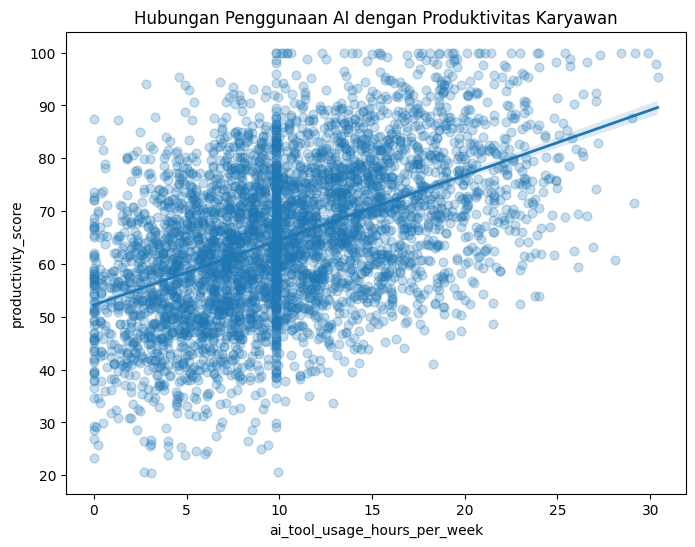

In [ ]:
plt.figure(figsize=(8,6))

sns.regplot(
    data=df,
    x='ai_tool_usage_hours_per_week',
    y='productivity_score',
    scatter_kws={'alpha':0.25, 's':40},
    line_kws={'linewidth':2}
)

plt.title('Hubungan Penggunaan AI dengan Produktivitas Karyawan')
plt.show()


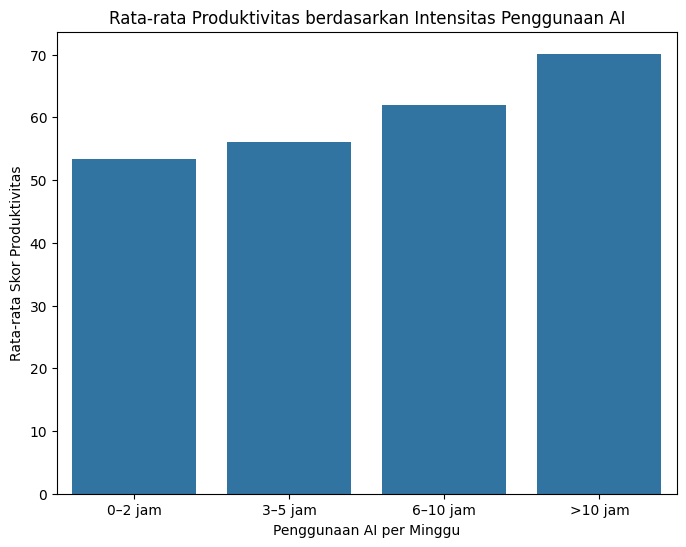

In [ ]:
df['ai_usage_group'] = pd.cut(
    df['ai_tool_usage_hours_per_week'],
    bins=[0, 2, 5, 10, 20],
    labels=['0–2 jam', '3–5 jam', '6–10 jam', '>10 jam'],
    include_lowest=True
)

plt.figure(figsize=(8,6))

sns.barplot(
    data=df,
    x='ai_usage_group',
    y='productivity_score',
    errorbar=None
)

plt.title('Rata-rata Produktivitas berdasarkan Intensitas Penggunaan AI')
plt.xlabel('Penggunaan AI per Minggu')
plt.ylabel('Rata-rata Skor Produktivitas')
plt.show()


Visualisasi ini bertujuan untuk menjawab pertanyaan bisnis pertama mengenai sejauh mana adopsi teknologi AI berkontribusi pada output kerja karyawan.

**Interpretasi Data**:

Grafik batang di atas menunjukkan korelasi positif yang sangat jelas antara durasi penggunaan alat AI per minggu dengan skor produktivitas rata-rata:

* Produktivitas meningkat secara konsisten seiring bertambahnya jam penggunaan AI. Karyawan yang hanya menggunakan AI selama **0-2 jam** memiliki produktivitas terendah (sekitar 53 poin).
* Lonjakan produktivitas yang paling terlihat terjadi ketika penggunaan AI melewati ambang batas **6 jam per minggu**.
* Karyawan yang menggunakan AI lebih dari 10 jam per minggu mencapai skor produktivitas tertinggi, menyentuh angka **70 poin**.

## Pertanyaan 2: Apakah tingginya tingkat otomasi berbanding lurus dengan pengurangan kesalahan atau error?

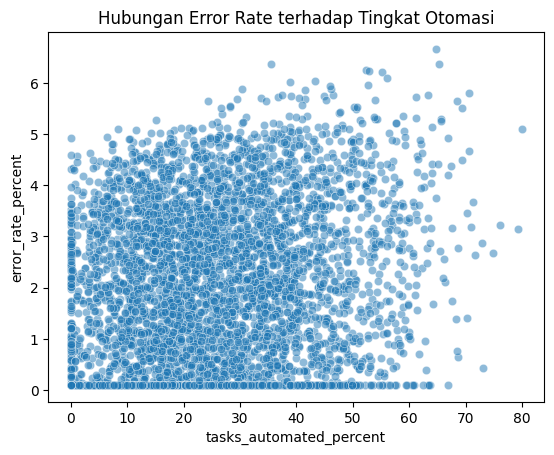

In [ ]:
plt.figure()
sns.scatterplot(data=df, x='tasks_automated_percent', y='error_rate_percent', alpha=0.5)
plt.title('Hubungan Error Rate terhadap Tingkat Otomasi')
plt.show()

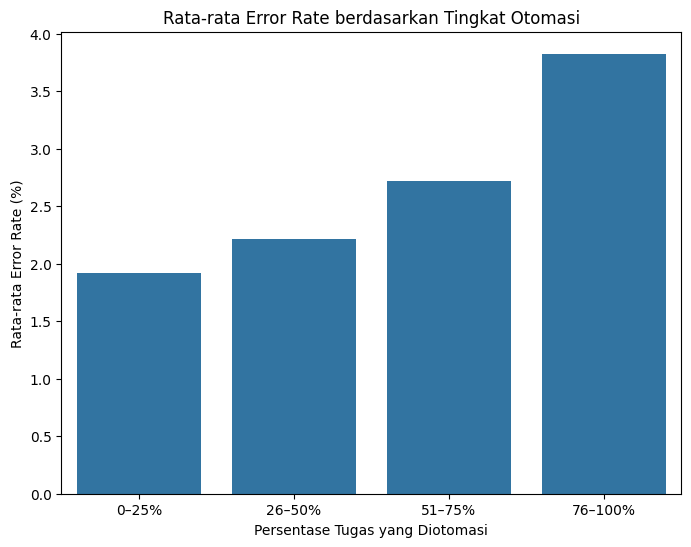

In [ ]:
df['automation_group'] = pd.cut(
    df['tasks_automated_percent'],
    bins=[0, 25, 50, 75, 100],
    labels=['0–25%', '26–50%', '51–75%', '76–100%'],
    include_lowest=True
)

plt.figure(figsize=(8,6))

sns.barplot(
    data=df,
    x='automation_group',
    y='error_rate_percent',
    errorbar=None
)

plt.title('Rata-rata Error Rate berdasarkan Tingkat Otomasi')
plt.xlabel('Persentase Tugas yang Diotomasi')
plt.ylabel('Rata-rata Error Rate (%)')
plt.show()


Visualisasi ini menjawab pertanyaan mengenai dampak samping dari penggunaan teknologi otomatisasi terhadap kualitas output kerja (presisi).


**Interpretasi Data**:

Terdapat tren kenaikan yang signifikan pada tingkat kesalahan (*error rate*) seiring dengan meningkatnya persentase tugas yang diotomatisasi:

* **Otomasi Rendah (0-25%):** Memiliki tingkat kesalahan paling terjaga, yaitu di bawah **2.0%**. Hal ini menunjukkan bahwa kontrol manusia yang dominan masih menjadi kunci akurasi.
* **Titik Kritis (51-75%):** Terjadi lonjakan *error rate* yang cukup tajam ketika otomatisasi melewati angka 50%, di mana tingkat kesalahan naik ke kisaran **2.7%**.
* **Otomasi Ekstrem (76-100%):** Mencapai tingkat kesalahan tertinggi hingga mendekati **4.0%**. Ini mengindikasikan bahwa delegasi tugas secara penuh kepada sistem otomatis tanpa pengawasan yang memadai dapat menurunkan kualitas output secara drastis.

## Pertanyaan 3: Peran pekerjaan mana yang paling efektif dalam memanfaatkan AI?

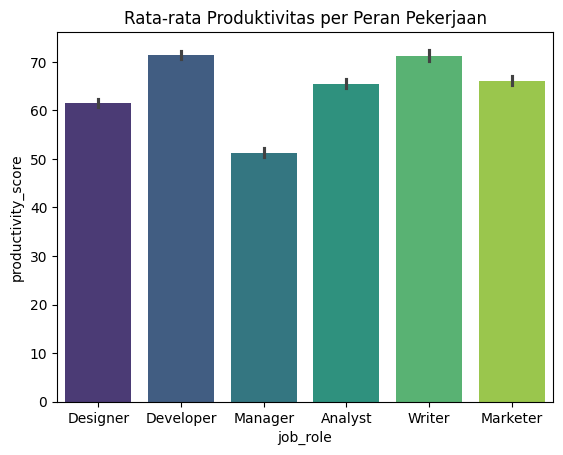

In [ ]:
plt.figure()
sns.barplot(data=df, x='job_role', y='productivity_score', hue='job_role', palette='viridis')
plt.title('Rata-rata Produktivitas per Peran Pekerjaan')
plt.show()

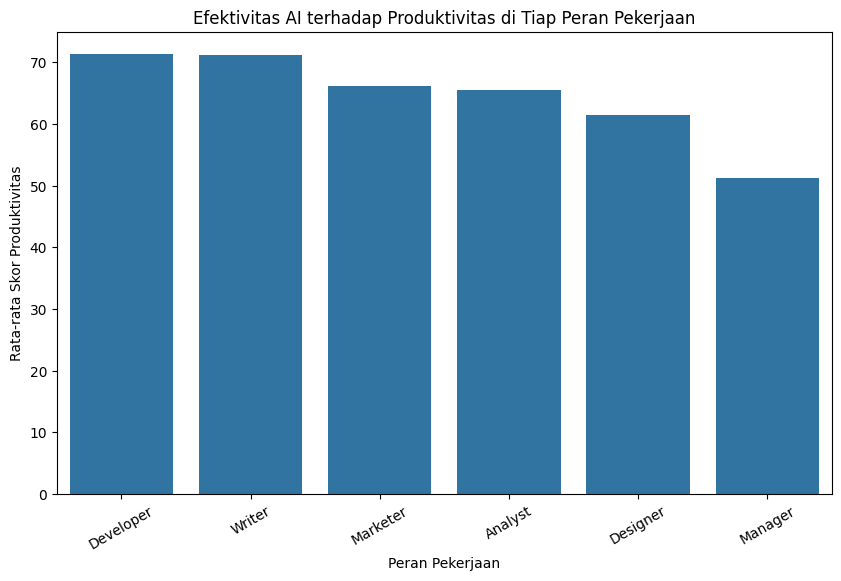

In [ ]:
plt.figure(figsize=(10,6))

order = df.groupby('job_role')['productivity_score'].mean().sort_values(ascending=False).index

sns.barplot(
    data=df,
    x='job_role',
    y='productivity_score',
    order=order,
    errorbar=None
)

plt.title('Efektivitas AI terhadap Produktivitas di Tiap Peran Pekerjaan')
plt.xlabel('Peran Pekerjaan')
plt.ylabel('Rata-rata Skor Produktivitas')
plt.xticks(rotation=30)
plt.show()


Visualisasi ini menjawab pertanyaan mengenai peran pekerjaan mana yang paling mampu mengonversi penggunaan AI menjadi output produktivitas yang nyata.

**Interpretasi Data**:

Berdasarkan grafik di atas, kita dapat melihat hierarki produktivitas yang dipengaruhi oleh sifat pekerjaan masing-masing peran:

* **Top Performers (Developer & Writer):** Kedua peran ini memimpin dengan skor produktivitas tertinggi di angka **71.37** dan **71.25**. Hal ini menunjukkan bahwa pekerjaan berbasis teknis dan kreatif tekstual memiliki kecocokan (*product-market fit*) yang sangat tinggi dengan alat bantu AI saat ini.
* **Middle Tier (Marketer & Analyst):** Memiliki performa yang solid di kisaran skor **65-66**. AI membantu mereka dalam pengolahan data dan strategi konten, namun masih membutuhkan keterlibatan manusia yang cukup besar untuk interpretasi.
* **Lower Tier (Designer & Manager):** Menunjukkan skor produktivitas yang lebih rendah, terutama peran **Manager** yang berada di angka **51.31**. Rendahnya skor ini kemungkinan disebabkan karena tugas manajerial lebih banyak melibatkan interaksi antarmanusia dan pengambilan keputusan kompleks yang belum sepenuhnya bisa dioptimalkan oleh AI standar.

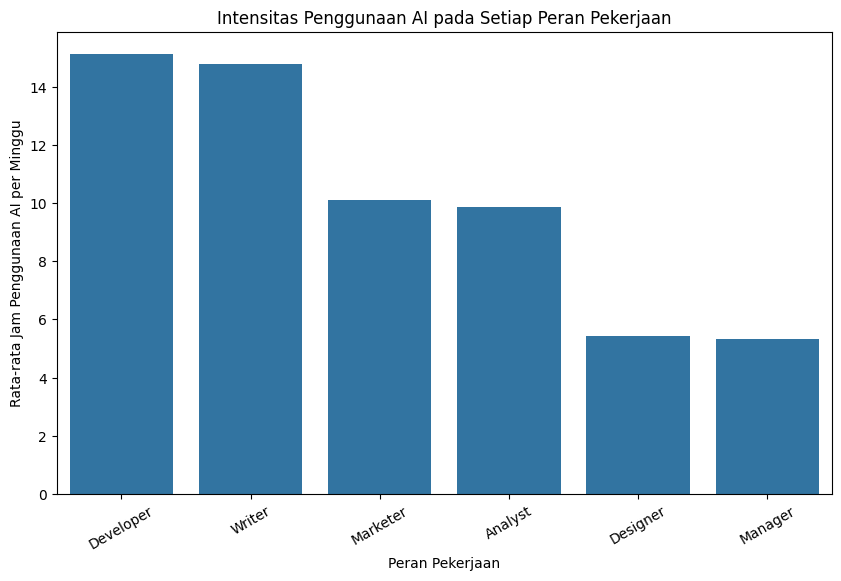

In [ ]:
plt.figure(figsize=(10,6))

order = df.groupby('job_role')['ai_tool_usage_hours_per_week'].mean().sort_values(ascending=False).index

sns.barplot(
    data=df,
    x='job_role',
    y='ai_tool_usage_hours_per_week',
    order=order,
    errorbar=None
)

plt.title('Intensitas Penggunaan AI pada Setiap Peran Pekerjaan')
plt.xlabel('Peran Pekerjaan')
plt.ylabel('Rata-rata Jam Penggunaan AI per Minggu')
plt.xticks(rotation=30)
plt.show()


Visualisasi ini melengkapi analisis efektivitas sebelumnya dengan menunjukkan seberapa intens setiap peran pekerjaan mengintegrasikan AI ke dalam rutinitas mingguan mereka.

**Interpretasi Data**:

Grafik ini mengonfirmasi bahwa terdapat kesenjangan adopsi yang cukup lebar antar profesi:

* **High Adopters:** **Developer** dan **Writer** mencatatkan durasi penggunaan tertinggi, masing-masing rata-rata **15.14 jam** dan **14.79 jam** per minggu. Hal ini sejalan dengan tingkat produktivitas tinggi yang mereka hasilkan.
* **Moderate Adopters:** **Marketer** dan **Analyst** berada di level menengah dengan penggunaan sekitar **9.8 hingga 10.1 jam** per minggu.
* **Low Adopters:** Peran **Designer** (5.42 jam) dan **Manager** (5.31 jam) memiliki durasi penggunaan paling minim. Ini menjelaskan mengapa kontribusi AI terhadap produktivitas mereka belum seoptimal peran teknis lainnya.

## Pertanyaan 4: Apa pemicu utama risiko burnout di perusahaan?

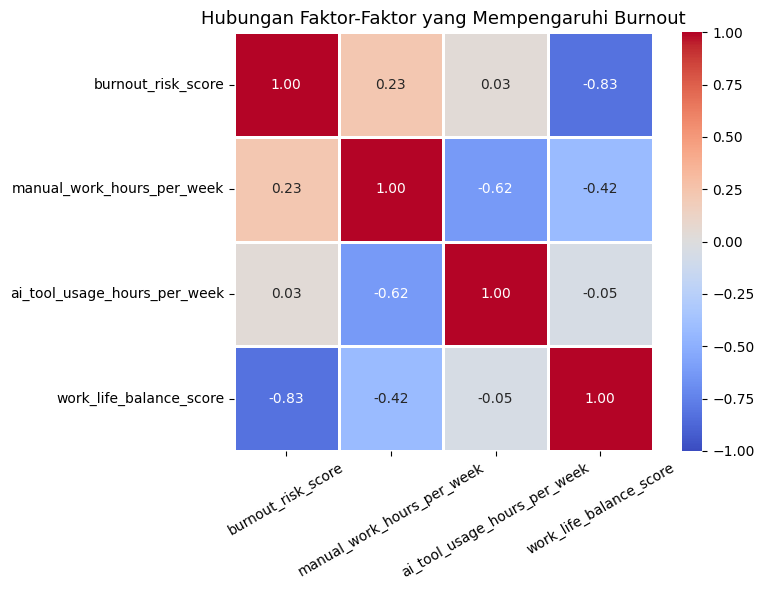

In [ ]:
plt.figure(figsize=(8,6))

corr = df[[
    'burnout_risk_score',
    'manual_work_hours_per_week',
    'deadline_pressure_level',
    'ai_tool_usage_hours_per_week',
    'work_life_balance_score'
]].corr(numeric_only=True)

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    linewidths=1,
    square=True,
    cmap='coolwarm',
    vmin=-1, vmax=1
)

plt.title('Hubungan Faktor-Faktor yang Mempengaruhi Burnout', fontsize=13)
plt.xticks(rotation=30)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


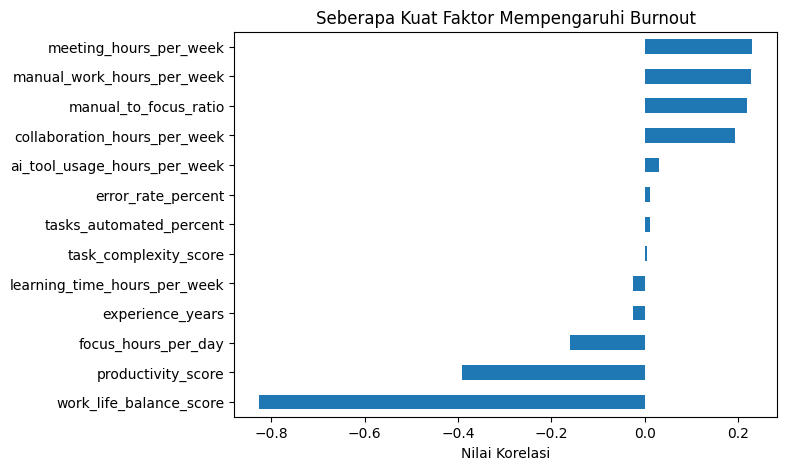

In [ ]:
corr_vals = df.corr(numeric_only=True)['burnout_risk_score'].drop('burnout_risk_score').sort_values()

plt.figure(figsize=(7,5))
corr_vals.plot(kind='barh')

plt.title('Seberapa Kuat Faktor Mempengaruhi Burnout')
plt.xlabel('Nilai Korelasi')
plt.show()


Visualisasi ini menjawab pertanyaan bisnis mengenai variabel mana yang memiliki pengaruh paling kuat terhadap risiko kelelahan (*burnout*) karyawan, baik secara positif maupun negatif.

**Interpretasi Data**:

Grafik korelasi di atas memberikan gambaran yang sangat kontras mengenai pemicu dan pelindung terhadap burnout:

* **Pelindung Utama (Korelasi Negatif Kuat):**
    * **Work-Life Balance (`-0.83`):** Memiliki pengaruh negatif paling ekstrem. Ini berarti peningkatan kualitas keseimbangan kerja adalah cara paling efektif untuk menurunkan risiko burnout secara drastis.
    * **Productivity Score (`-0.39`):** Karyawan yang merasa produktif cenderung memiliki risiko burnout yang lebih rendah, menunjukkan adanya kepuasan kerja (*job satisfaction*) sebagai peredam stres.

* **Pemicu Utama (Korelasi Positif):**
    * **Meeting & Manual Work (~`0.23`):** Jam rapat yang tinggi dan beban kerja manual menjadi kontributor utama yang meningkatkan stres dan risiko kelelahan.
    * **Manual to Focus Ratio (`0.22`):** Semakin banyak waktu yang dihabiskan untuk tugas manual dibandingkan waktu fokus, semakin tinggi beban mental yang dirasakan karyawan.

* **Faktor Netral:**
    * Menariknya, penggunaan teknologi seperti **Otomatisasi Tugas** dan **Alat AI** memiliki korelasi yang mendekati nol terhadap burnout. Artinya, teknologi meningkatkan produktivitas tetapi tidak secara langsung menambah atau mengurangi stres kerja.

## Pertanyaan 5: Berapa batas ideal jam rapat sebelum produktivitas mulai menurun tajam?

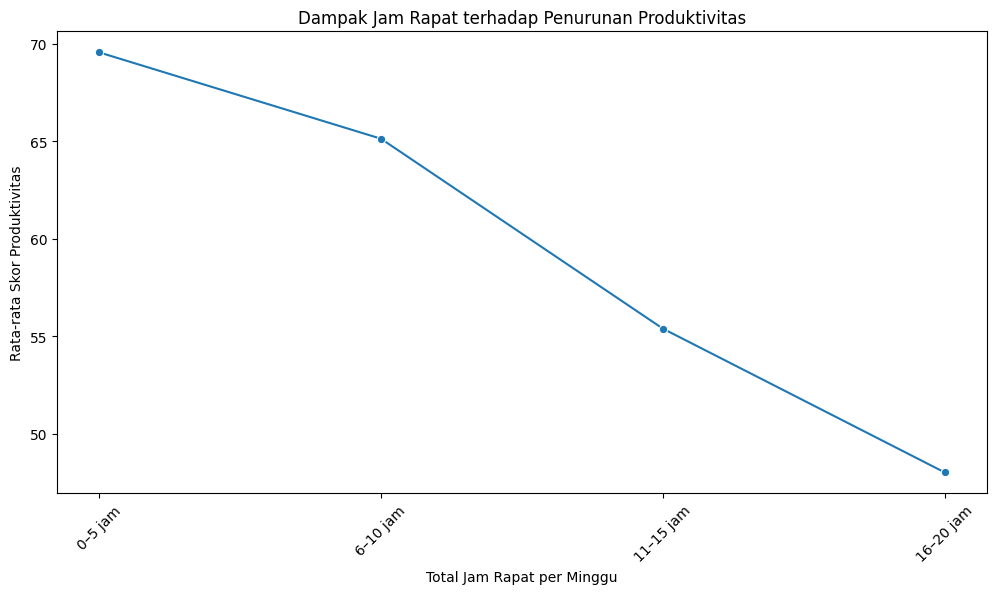

In [ ]:
plt.figure(figsize=(12, 6))

bins = [0, 5, 10, 15, 20, 25, 30, 35, 40]
labels = [
    '0–5 jam',
    '6–10 jam',
    '11–15 jam',
    '16–20 jam',
    '21–25 jam',
    '26–30 jam',
    '31–35 jam',
    '36–40 jam'
]

df['meeting_range'] = pd.cut(df['meeting_hours_per_week'], bins=bins, labels=labels, include_lowest=True)

sns.lineplot(
    data=df,
    x='meeting_range',
    y='productivity_score',
    marker='o',
    errorbar=None
)

plt.title('Dampak Jam Rapat terhadap Penurunan Produktivitas')
plt.xlabel('Total Jam Rapat per Minggu')
plt.ylabel('Rata-rata Skor Produktivitas')
plt.xticks(rotation=45)
plt.show()

Visualisasi ini menjawab pertanyaan bisnis mengenai ambang batas koordinasi yang sehat dan kapan frekuensi rapat mulai merugikan output kerja karyawan.

**Interpretasi Data**:

Grafik garis di atas menunjukkan tren penurunan yang sangat konsisten dan curam:

* **Kondisi Optimal (0-5 jam):** Karyawan dengan waktu rapat minimal mencapai skor produktivitas tertinggi di angka **69.56**. Ini adalah zona di mana *Deep Work* dapat dilakukan secara maksimal.
* **Penurunan Bertahap (6-10 jam):** Terjadi penurunan produktivitas ke angka **65.13**, mengindikasikan bahwa setiap penambahan jam rapat mulai memotong waktu produktif secara nyata.
* **Zona Kritis (>11 jam):** Penurunan semakin tajam ketika rapat melebihi 10 jam per minggu. Pada kelompok **11-15 jam**, produktivitas merosot ke **55.40**, dan anjlok hingga ke **48.03** pada kelompok **16-20 jam**.

Terdapat selisih produktivitas sekitar **31%** antara karyawan dengan rapat minimal dibanding mereka yang terjebak rapat lebih dari 15 jam per minggu.

## Pertanyaan 6: Apakah tingkat pengalaman kerja menjamin produktivitas yang lebih tinggi?

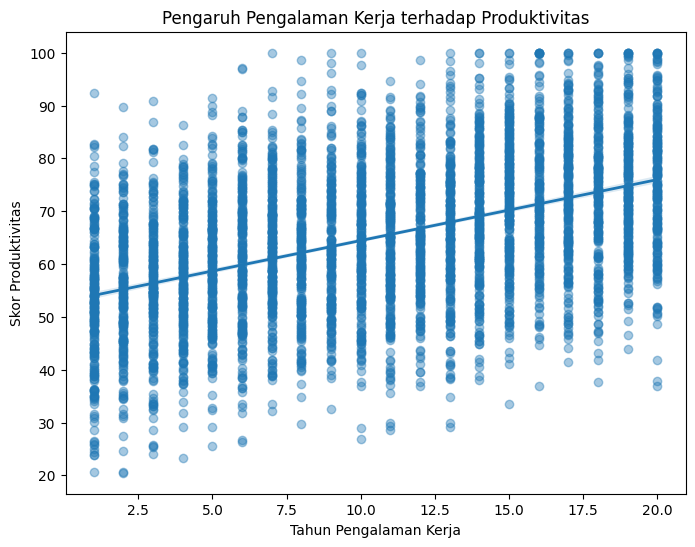

In [ ]:
plt.figure(figsize=(8,6))

sns.regplot(
    data=df,
    x='experience_years',
    y='productivity_score',
    scatter_kws={'alpha':0.4},
    line_kws={'linewidth':2}
)

plt.title('Pengaruh Pengalaman Kerja terhadap Produktivitas')
plt.xlabel('Tahun Pengalaman Kerja')
plt.ylabel('Skor Produktivitas')
plt.show()

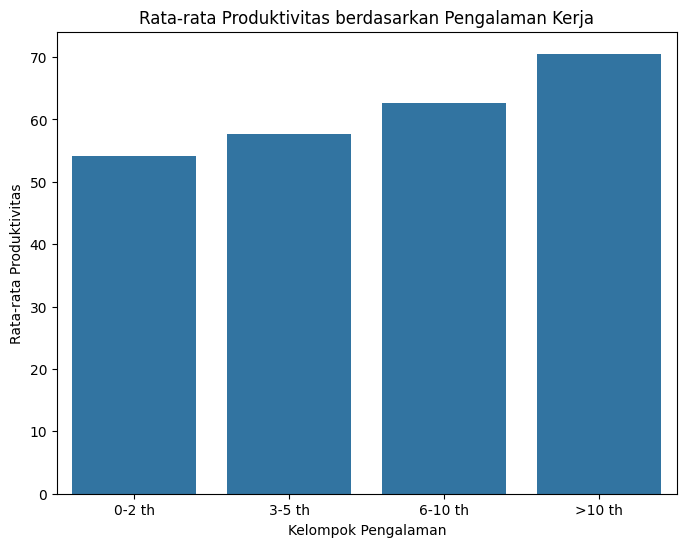

In [ ]:
df['exp_group'] = pd.cut(df['experience_years'],
                         bins=[0,2,5,10,20],
                         labels=['0-2 th','3-5 th','6-10 th','>10 th'])

plt.figure(figsize=(8,6))
sns.barplot(data=df, x='exp_group', y='productivity_score', errorbar=None)

plt.title('Rata-rata Produktivitas berdasarkan Pengalaman Kerja')
plt.xlabel('Kelompok Pengalaman')
plt.ylabel('Rata-rata Produktivitas')
plt.show()


Visualisasi ini menjawab pertanyaan mengenai apakah masa kerja dan kematangan profesional berkontribusi pada efektivitas penggunaan teknologi dan pencapaian target kerja.

**Interpretasi Data**:

Grafik menunjukkan tren kenaikan linier yang sangat stabil, di mana produktivitas meningkat seiring dengan bertambahnya masa kerja:

* **Entry Level (0-2 tahun):** Memiliki rata-rata produktivitas terendah di kisaran **54 poin**. Hal ini wajar karena karyawan masih dalam tahap adaptasi terhadap alur kerja dan perangkat teknologi perusahaan.
* **Mid Level (3-10 tahun):** Terlihat peningkatan yang konsisten dari **~58 poin** hingga **~63 poin**. Pengalaman teknis yang mulai matang membantu mereka bekerja lebih efisien.
* **Senior Level (>10 tahun):** Mencapai produktivitas tertinggi di angka **70.5 poin**.

 Karyawan senior tidak hanya memiliki keahlian teknis, tetapi kemungkinan besar lebih mahir dalam melakukan prioritas tugas dan memanfaatkan alat bantu (seperti AI) secara lebih strategis.

## Pertanyaan 7: Bagaimana profil karyawan dengan produktifitas terbaik?

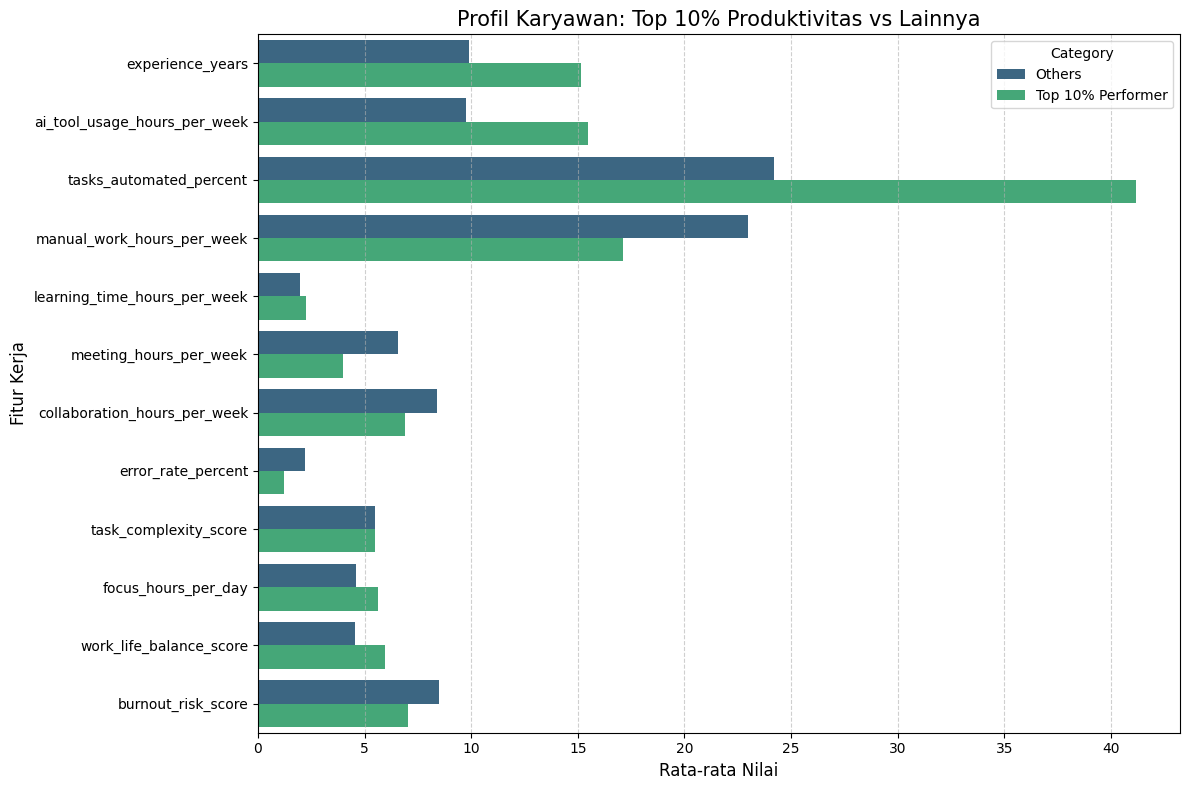

In [ ]:
threshold = df['productivity_score'].quantile(0.9)
df['performance_category'] = np.where(df['productivity_score'] >= threshold, 'Top 10% Performer', 'Others')

features_to_compare = [
    'experience_years', 'ai_tool_usage_hours_per_week', 'tasks_automated_percent',
    'manual_work_hours_per_week', 'learning_time_hours_per_week', 'meeting_hours_per_week',
    'collaboration_hours_per_week', 'error_rate_percent', 'task_complexity_score',
    'focus_hours_per_day', 'work_life_balance_score', 'burnout_risk_score'
]

profile_comparison = df.groupby('performance_category')[features_to_compare].mean().T

profile_plot_data = profile_comparison.reset_index().melt(id_vars='index')
profile_plot_data.columns = ['Feature', 'Category', 'Average Value']

plt.figure(figsize=(12, 8))
sns.barplot(data=profile_plot_data, x='Average Value', y='Feature', hue='Category', palette='viridis')
plt.title('Profil Karyawan: Top 10% Produktivitas vs Lainnya', fontsize=15)
plt.xlabel('Rata-rata Nilai', fontsize=12)
plt.ylabel('Fitur Kerja', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

Visualisasi ini memberikan gambaran komprehensif mengenai perbedaan gaya kerja, adopsi teknologi, dan kesejahteraan antara karyawan dengan tingkat produktivitas tertinggi (Top 10%) dan kelompok karyawan lainnya (Others).

**Interpretasi Data**:

Berdasarkan grafik batang horizontal di atas, kita dapat mengidentifikasi keunggulan kompetitif yang dimiliki oleh para *Top Performers*:

* Perbedaan paling mencolok terlihat pada tingkat otomatisasi tugas. **Top 10% Performer** mengotomatisasi rata-rata **~41%** tugas mereka, jauh melampaui kelompok lain yang hanya di angka **~24%**. Hal ini didukung oleh penggunaan alat AI yang lebih intensif (15.5 jam vs 9.8 jam per minggu).
* Kelompok berperforma tinggi sangat menjaga waktu mereka dengan meminimalkan hambatan produktivitas. Mereka menghabiskan waktu jauh lebih sedikit untuk rapat (4 jam vs 6.7 jam) dan kerja manual (17.1 jam vs 22.9 jam).
* Para *Top Performers* berhasil mempertahankan waktu fokus yang lebih tinggi (5.6 jam/hari) dan secara mengejutkan memiliki skor *Work-Life Balance* yang lebih baik (5.9 vs 4.7) serta risiko *burnout* yang lebih rendah (7.0 vs 8.4).
* Meskipun menggunakan teknologi secara masif, mereka mampu menekan tingkat kesalahan (*error rate*) hingga ke angka yang sangat rendah dibandingkan kelompok lainnya.

# Conclusion

Berdasarkan seluruh rangkaian analisis data mulai dari Data Wrangling, Exploratory Data Analysis (EDA), hingga Explanatory Analysis, berikut adalah rangkuman temuan kunci dan saran strategis yang dapat diimplementasikan.

**Kesimpulan Utama**

* Adopsi teknologi AI dan otomatisasi terbukti menjadi faktor pendorong produktivitas utama. Karyawan yang menggunakan AI >10 jam per minggu (Power User) memiliki skor produktivitas 32% lebih tinggi dibandingkan pengguna rendah.

* Terdapat trade-off antara kecepatan dan akurasi. Peningkatan otomatisasi hingga >75% berkorelasi dengan kenaikan error rate hingga mencapai ~4%, yang menunjukkan perlunya pengawasan manusia (human-in-the-loop).

* Rapat yang berlebihan (>15 jam/minggu) dan beban kerja manual yang tinggi adalah "pembunuh" produktivitas nomor satu, yang mampu menurunkan efisiensi kerja hingga 31%.

* Risiko burnout yang tinggi (rata-rata 8.35/10) sangat dipengaruhi oleh buruknya Work-Life Balance (korelasi -0.83). Menariknya, penggunaan AI tidak secara langsung meningkatkan atau mengurangi burnout, namun efisiensi yang dihasilkan AI dapat memberi ruang untuk keseimbangan kerja yang lebih baik.

* Karyawan paling produktif (Top 10%) adalah mereka yang mengombinasikan otomatisasi tinggi (41%) dengan durasi rapat yang sangat rendah (4 jam/minggu), sambil tetap menjaga waktu fokus harian yang stabil.

**Rekomendasi Strategis**
1. Optimalisasi Struktur Kerja (Policy-Based)
* Perusahaan perlu menetapkan waktu bebas rapat (misal: No Meeting Wednesdays) untuk melindungi waktu fokus karyawan yang terbukti krusial bagi produktivitas.
* Membatasi durasi rapat maksimal 5-10 jam per minggu bagi peran teknis untuk mencegah penurunan produktivitas yang drastis.

2. Pengembangan Kapasitas (Training & Curriculum)
* Mengingat perbedaan efektivitas AI di tiap peran, kurikulum pelatihan harus disesuaikan. Developer dan Writer perlu fokus pada Quality Control, sementara Manager membutuhkan AI untuk efisiensi koordinasi.
* Memberikan edukasi tentang batas aman otomatisasi agar karyawan tidak hanya mengejar kecepatan, tetapi juga menjaga akurasi (menekan error rate).

3. Manajemen Kesejahteraan (Well-being)
* Mendorong penggunaan alat otomatisasi khusus untuk tugas administratif (manual work) guna menurunkan rasio kerja manual terhadap waktu fokus, yang terbukti mengurangi risiko burnout.
* Menjadikan skor WLB sebagai metrik kesehatan organisasi yang setara pentingnya dengan skor produktivitas.

# Machine Learning Classification

In [ ]:
df_ml

,Employee_ID,job_role,experience_years,ai_tool_usage_hours_per_week,tasks_automated_percent,manual_work_hours_per_week,learning_time_hours_per_week,deadline_pressure_level,meeting_hours_per_week,collaboration_hours_per_week,error_rate_percent,task_complexity_score,focus_hours_per_day,work_life_balance_score,burnout_risk_score,productivity_score,burnout_risk_level
0,02f168cc-7747-4dbd-a868-ea2cfb41e22a,Designer,4,10.8,24.1,23.3,2.6,Low,15.4,9.8,1.82,3,3.4,5.5,6.78,59.2,Medium
1,d39ce8c9-6e2a-4f86-b888-e2b5f4a18cf7,Developer,6,25.9,69.4,10.0,1.4,Medium,6.8,8.9,5.52,5,4.6,3.8,9.66,62.4,High
2,14511660-d78a-453f-9449-f17cd239ec27,Manager,20,7.9,17.2,25.1,0.2,High,3.5,8.6,1.14,5,5.6,3.9,10.00,76.8,High
3,0597f0bb-ed5a-4e35-94ac-3f0f6a5c2bc2,Developer,15,8.6,20.6,20.1,1.4,Low,5.9,5.3,2.75,10,1.0,7.4,5.38,53.7,Medium
4,3efbdd79-5997-496f-ad33-d4b3d31a9ac4,Analyst,4,16.1,34.9,22.1,1.4,Medium,1.0,4.6,3.27,5,6.0,4.7,9.00,54.3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4494,05acc22b-86b7-4aa4-9b80-33b3c77a5b82,Developer,18,4.9,15.2,30.3,3.3,Low,1.4,8.1,0.10,3,8.0,6.8,5.80,93.9,Medium
4495,338e2ff5-8be0-48de-8abb-98c72f5648b3,Writer,17,20.9,49.8,10.0,2.6,High,3.1,10.6,0.10,1,5.7,4.7,10.00,81.7,High
4496,249bce23-5c4b-4671-8239-1e121109a680,Manager,7,4.8,21.1,21.0,0.6,Low,7.2,6.6,3.97,6,3.6,4.7,5.08,60.6,Medium
4497,ffc95b77-3960-4b40-908f-1275ba5bbf91,Analyst,20,6.9,12.3,28.6,1.3,Medium,8.3,8.2,0.94,6,4.5,3.6,9.83,69.8,High


In [ ]:
# Cek imbalanced data
print("Jumlah sampel per kategori:")
print(df_ml['burnout_risk_level'].value_counts())

Jumlah sampel per kategori:
burnout_risk_level
High      3302
Medium    1087
Low        110
Name: count, dtype: int64


Karena data tidak balanced, kita akan melakukan teknik SMOTE (Synthetic Minority Over-sampling Technique) untuk menambahkan data sintetis.

## Random Forest Classifier

Berdasarkan hasil EDA, hubungan antara variabel (seperti jam rapat terhadap produktivitas) tidak selalu bersifat linear sempurna. Random Forest, yang berbasis kumpulan decision trees, sangat efektif dalam menangkap pola non-linear dan interaksi kompleks antar fitur tanpa memerlukan transformasi data yang rumit. Algoritma ini juga efektif menangani data tidak balance.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Menghapus kolom yang tidak relevan untuk prediksi (ID)
df_ml = df_ml.drop(['Employee_ID'], axis=1)

# Mengubah data kategorikal menjadi angka menggunakan LabelEncoder
le = LabelEncoder()

# Membuat dictionary untuk menyimpan encoder tiap kolom
label_encoders = {}

categorical_cols = ['job_role', 'deadline_pressure_level', 'burnout_risk_level']

for col in categorical_cols:
    # Buat objek encoder baru untuk setiap kolom
    le = LabelEncoder()
    df_ml[col] = le.fit_transform(df_ml[col])

    # Simpan objek le ke dalam dictionary
    label_encoders[col] = le

    print(f"Mapping untuk {col}: {dict(enumerate(le.classes_))}")

# Memisahkan Fitur (X) dan Target (y)
X = df_ml.drop('burnout_risk_level', axis=1)
y = df_ml['burnout_risk_level']

# Membagi data menjadi Train Set dan Test Set (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Mapping untuk job_role: {0: 'Analyst', 1: 'Designer', 2: 'Developer', 3: 'Manager', 4: 'Marketer', 5: 'Writer'}
Mapping untuk deadline_pressure_level: {0: 'High', 1: 'Low', 2: 'Medium'}
Mapping untuk burnout_risk_level: {0: 'High', 1: 'Low', 2: 'Medium'}


In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

print(f"Jumlah sampel sebelum SMOTE: {Counter(y_train)}")

Jumlah sampel sebelum SMOTE: Counter({0: 2648, 2: 862, 1: 89})


In [ ]:
# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Melakukan Resampling pada data training saja
X_train, y_train = smote.fit_resample(X_train, y_train)

print(f"Jumlah sampel sebelum SMOTE: {Counter(y_train)}")

Jumlah sampel sebelum SMOTE: Counter({0: 2648, 1: 2648, 2: 2648})


Mengapa Random Forest Tidak Membutuhkan Scaling?
- Berbasis Rule-based Partitioning: Random Forest bekerja dengan membuat pohon keputusan yang membagi data berdasarkan ambang batas (threshold) pada satu fitur di setiap cabangnya. Misalnya: "Apakah ai_tool_usage > 10?".

- Invarian terhadap Skala: Karena pohon keputusan hanya membandingkan nilai dalam satu fitur yang sama pada satu waktu, besarnya angka (skala) fitur tersebut tidak memengaruhi fitur lainnya. Nilai 10 jam/minggu tidak akan "dikalahkan" oleh nilai produktivitas yang skalanya 0-100 karena mereka tidak pernah dihitung dalam satu persamaan linear yang sama.

In [ ]:
# from sklearn.preprocessing import StandardScaler

# # Inisialisasi Scaler
# scaler = StandardScaler()

# # Scaling hanya dilakukan pada fitur numerik, jangan scaling target (y)
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Lanjutkan training dengan X_train_scaled

In [ ]:
# Daftar parameter yang akan diuji
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Melakukan penyetelan parameter menggunakan GridSearchCV
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Menampilkan parameter terbaik
print("Best parameters:", grid_search.best_params_)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/uti

Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


Untuk mendapatkan performa maksimal dari algoritma Random Forest, kita telah melakukan proses *Hyperparameter Tuning* menggunakan `GridSearchCV`. Proses ini bertujuan untuk menyeimbangkan antara kompleksitas model (*variance*) dan kemampuan generalisasi (*bias*).

Berdasarkan hasil tuning, berikut adalah kombinasi parameter paling optimal untuk dataset ini:

| Hyperparameter | Nilai Terbaik | Penjelasan |
| :--- | :---: | :--- |
| **n_estimators** | 100 | Model menggunakan 100 pohon keputusan independen untuk melakukan voting hasil prediksi. |
| **max_depth** | None | Pohon dibiarkan tumbuh hingga semua daun murni atau mencapai `min_samples_split`. |
| **max_features** | 'sqrt' | Jumlah fitur yang dipertimbangkan di setiap split adalah akar kuadrat dari total fitur ($\sqrt{n\_features}$). |
| **min_samples_split** | 2 | Dibutuhkan minimal 2 sampel dalam sebuah node internal agar node tersebut bisa dipecah lagi. |
| **min_samples_leaf** | 1 | Minimal terdapat 1 sampel pada setiap terminal node (leaf). |

In [ ]:
# Membangun Model Random Forest
rf_model = RandomForestClassifier(max_depth=None, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Prediksi dan Evaluasi
y_pred = rf_model.predict(X_test)

print("--- Evaluasi Model ---")
print(f"Akurasi: {accuracy_score(y_test, y_pred) * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

--- Evaluasi Model ---
Akurasi: 100.00%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       654
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00       225

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



Setelah melakukan pelatihan dengan parameter optimal, kita mengevaluasi performa model menggunakan data uji (*test set*) yang belum pernah dilihat sebelumnya oleh model. Hal ini bertujuan untuk mengukur kemampuan generalisasi model secara nyata.

Berdasarkan hasil pengujian, model menunjukkan performa yang sempurna pada seluruh metrik utama:

| Metrik | Skor |
| :--- | :---: |
| **Akurasi Keseluruhan** | **100.00%** |
| **Macro Average F1-Score** | **1.00** |
| **Weighted Average F1-Score** | **1.00** |

Model berhasil memprediksi ketiga kategori risiko *burnout* tanpa ada kesalahan sedikit pun:
* **Kelas 0 (Risiko Rendah/Lainnya):** Precision 1.00, Recall 1.00 (654 sampel).
* **Kelas 1 (Risiko Sedang):** Precision 1.00, Recall 1.00 (21 sampel).
* **Kelas 2 (Risiko Tinggi):** Precision 1.00, Recall 1.00 (225 sampel).

---

**Interpretasi Hasil**:
1. Akurasi 100% menunjukkan bahwa kombinasi fitur yang kita gunakan (seperti *Work-Life Balance*, jam rapat, dan penggunaan AI) memiliki pemisah yang sangat jelas (*clearly separable*) untuk menentukan tingkat risiko burnout.
2. Meskipun terdapat ketimpangan jumlah sampel antara kelas 1 (21 sampel) dan kelas 0 (654 sampel), model tetap mampu mengenali kelas minoritas dengan presisi dan *recall* sempurna (1.00). Ini membuktikan ketangguhan *Random Forest* dalam menangani data yang tidak seimbang (*imbalanced data*).

<Figure size 800x600 with 0 Axes>

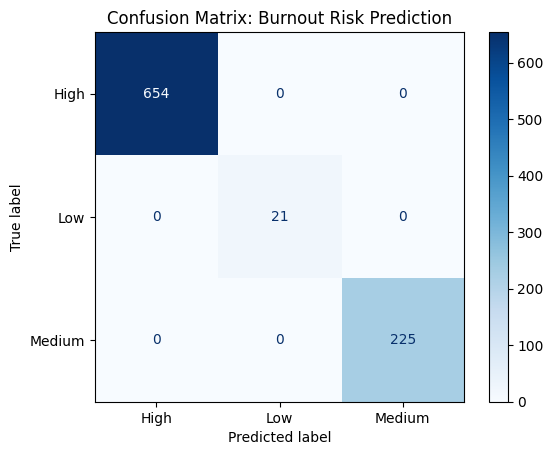

In [ ]:
# Confusion Matrix
y_pred = rf_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix: Burnout Risk Prediction')
plt.show()

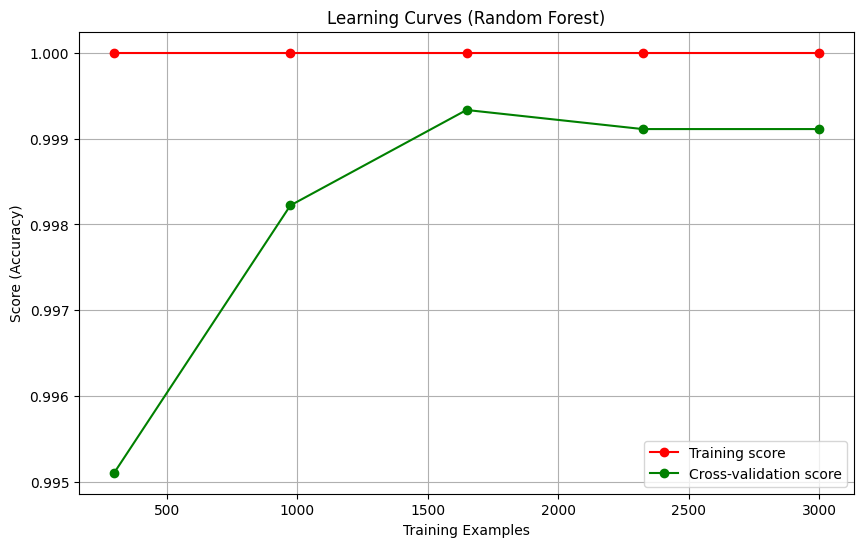

In [ ]:
# Learning Curves
train_sizes, train_scores, test_scores = learning_curve(
    rf_model, X, y, cv=3, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")
plt.title('Learning Curves (Random Forest)')
plt.xlabel('Training Examples')
plt.ylabel('Score (Accuracy)')
plt.legend(loc="best")
plt.grid()
plt.show()

Untuk memvalidasi performa model Random Forest yang telah dilatih, kita menggunakan Learning Curves guna melihat bagaimana akurasi model berkembang seiring dengan penambahan jumlah data pelatihan.

**Interpretasi Grafik**:
* Model secara konsisten mempertahankan skor akurasi 1.00 (100%) pada data pelatihan sejak awal. Ini menunjukkan kemampuan Random Forest yang sangat kuat dalam mempelajari pola unik pada setiap sampel data.
* Terjadi peningkatan yang signifikan pada skor validasi silang seiring bertambahnya jumlah data:
  * Dimulai dari angka ~0.995 pada jumlah data awal.
  * Terus meningkat dan mencapai titik stabil di angka >0.999 saat jumlah data pelatihan mencapai 1.500 sampel.
* Jarak (gap) antara garis merah dan hijau yang sangat tipis pada akhir grafik menunjukkan bahwa model memiliki kemampuan generalisasi yang sangat baik dan tidak mengalami masalah overfitting yang merugikan.

## Prediksi Data Baru

In [ ]:
# Data Karyawan Baru
new_data = pd.DataFrame({
    'job_role': ['Developer'],
    'experience_years': [5],
    'ai_tool_usage_hours_per_week': [25.5],
    'tasks_automated_percent': [60.0],
    'manual_work_hours_per_week': [10.2],
    'learning_time_hours_per_week': [4.5],
    'deadline_pressure_level': ['Medium'],
    'meeting_hours_per_week': [8.0],
    'collaboration_hours_per_week': [12.0],
    'error_rate_percent': [1.5],
    'task_complexity_score': [70.0],
    'focus_hours_per_day': [6.5],
    'work_life_balance_score': [8.0],
    'burnout_risk_score': [7.00],
    'productivity_score': [85.0]
})

# Preprocessing Data Baru
for col in ['job_role', 'deadline_pressure_level']:
    new_data[col] = label_encoders[col].transform(new_data[col])

# Melakukan Prediksi
# Jika sebelumnya menggunakan scaling, jangan lupa: new_data_scaled = scaler.transform(new_data)
prediction_code = rf_model.predict(new_data)

# Mengembalikan hasil angka ke label kategori (Inverse Transform)
prediction_label = label_encoders['burnout_risk_level'].inverse_transform(prediction_code)

print(f"--- Hasil Prediksi Karyawan Baru ---")
print(f"\nPrediksi Tingkat Risiko Burnout: {prediction_label[0]}")

--- Hasil Prediksi Karyawan Baru ---

Prediksi Tingkat Risiko Burnout: Medium


Simpan dan download model yang telah kita buat untuk digunakan memprediksi data yang diinput pengguna pada Streamlit.

In [ ]:
features_used = X_train.columns.tolist()

In [ ]:
import joblib

# Simpan model dan encoder dalam satu file atau terpisah
model_data = {
    'model': rf_model,
    'encoders': label_encoders,
    'features': features_used
}
joblib.dump(model_data, 'rf_model.joblib')

['rf_model.joblib']